# Основи нейромереж (MNIST)

MNIST (Modified National Institute of Standards and Technology) – це популярний датасет для навчання та тестування алгоритмів машинного навчання, зокрема для задач класифікації зображень.

### Основні характеристики:
- **Тип даних:** Зображення рукописних цифр від 0 до 9.
- **Розмірність:** Кожне зображення має розмір 28x28 пікселів у градаціях сірого (одноканальне зображення).
- **Кількість даних:**
  - 60,000 зображень для тренування.
  - 10,000 зображень для тестування.
  - Класи: 10 класів (цифри від 0 до 9).

In [11]:

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# 1. Завантаження даних
# Завантажте MNIST з локального файлу
# Файл скачано з https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz
with np.load("mnist.npz") as data:
    x_train, y_train = data['x_train'], data['y_train']
    x_test, y_test = data['x_test'], data['y_test']

# 2. Попередня обробка даних
x_train = x_train / 255.0  # нормалізація значень пікселів у діапазон [0, 1]
x_test = x_test / 255.0
y_train = to_categorical(y_train, 10)  # one-hot encoding для міток
y_test = to_categorical(y_test, 10)

### One-hot encoding
One-hot encoding – це спосіб представлення категоріальних змінних у числовому вигляді, де кожен клас (категорія) представлений вектором з нулів та одним значенням 1 на позиції, що відповідає цьому класу.

In [12]:
print("Ось приклад one-hot векторів: \n", y_train)

Ось приклад one-hot векторів: 
 [[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


### Будуєм та навчаєм модель

In [13]:

# 3. Побудова моделі
model = Sequential([
    Flatten(input_shape=(28, 28)),   # Розгортання 28x28 у вектор довжиною 784
    Dense(128, activation='relu'),   # Перший прихований шар з 128 нейронами
    Dense(64, activation='relu'),    # Другий прихований шар з 64 нейронами
    Dense(10, activation='softmax')  # Вихідний шар для 10 класів
])

# 4. Компіляція моделі
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 5. Навчання моделі
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# 6. Оцінка на тестових даних
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8633 - loss: 0.4645 - val_accuracy: 0.9562 - val_loss: 0.1438
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9664 - loss: 0.1124 - val_accuracy: 0.9646 - val_loss: 0.1157
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9770 - loss: 0.0763 - val_accuracy: 0.9705 - val_loss: 0.0981
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9838 - loss: 0.0508 - val_accuracy: 0.9713 - val_loss: 0.0976
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9874 - loss: 0.0415 - val_accuracy: 0.9727 - val_loss: 0.0988
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9906 - loss: 0.0314 - val_accuracy: 0.9762 - val_loss: 0.0862
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9921 - loss: 0.0244 - val_accuracy: 0.9726 - val_loss: 0.1055
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9932 - loss: 0.0210 - 

### Візуалізація прогнозів моделі
Хочется бачити шо там творится

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step


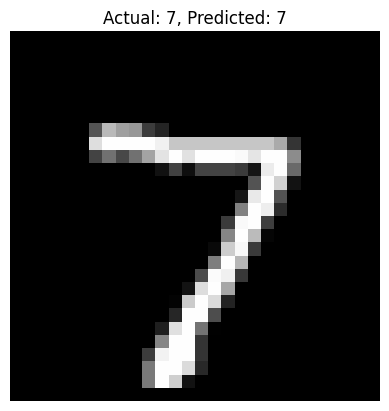

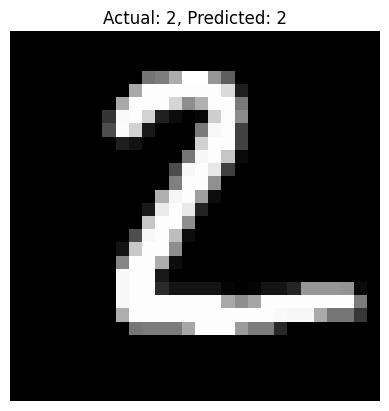

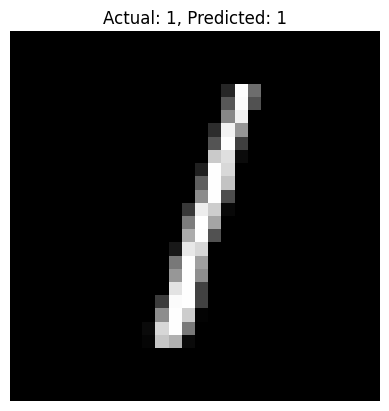

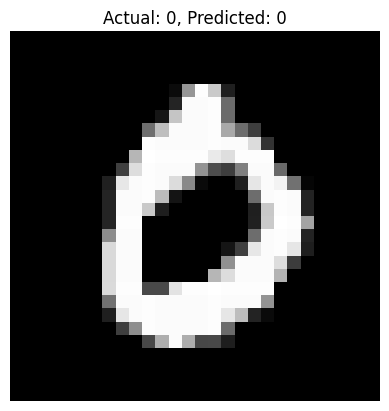

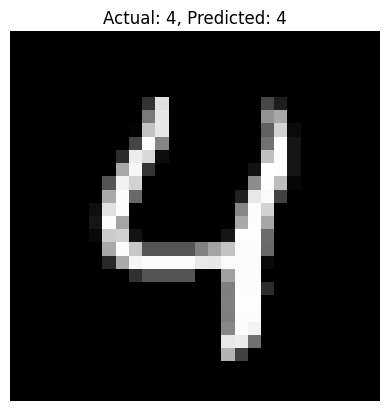

In [14]:
def show_predictions(model, x_data, y_data, num_samples=5):
    predictions = model.predict(x_data)
    for i in range(num_samples):
        plt.imshow(x_data[i], cmap='gray')
        plt.title(f"Actual: {np.argmax(y_data[i])}, Predicted: {np.argmax(predictions[i])}")
        plt.axis('off')
        plt.show()

# Показати кілька прикладів
show_predictions(model, x_test, y_test, num_samples=5)

### Висновок

- Модель добре справляється із завданням і досягає високої точності на тестових даних.
- Невелике перенавчання можна зменшити за допомогою регуляризації або збільшення даних.
- Точність 97.38% є хорошим результатом для нейромережі лише зі щільними шарами.